In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("http://bit.ly/uforeports")

In [3]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
df_state = df.groupby("State").count()

In [7]:
df_state.sort_values("Time", ascending=False, inplace=True)

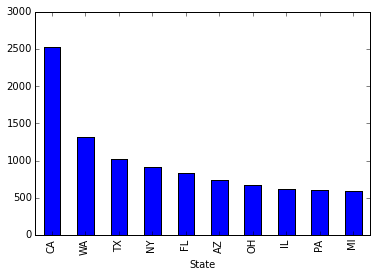

In [12]:
df_state.head(10).Time.plot(kind='bar')

In [15]:
rawdata=np.random.randn(3,5)

In [16]:
df2 = pd.DataFrame(rawdata, columns=list("ABCDE"), index=list(range(1,4)))

In [17]:
df2

,A,B,C,D,E
1,-0.425313,-0.363398,-0.939385,-1.818797,-1.583085
2,-0.152596,-2.140711,-0.105720,0.340208,0.173876
3,1.126876,-0.963334,-0.301287,0.706431,-0.175976


In [18]:
df2.A

1   -0.425313
2   -0.152596
3    1.126876
Name: A, dtype: float64

In [19]:
df2[["C","E"]]

,C,E
1,-0.939385,-1.583085
2,-0.105720,0.173876
3,-0.301287,-0.175976


In [27]:
df2.loc[2:3,"B":"D"]

,B,C,D
2,-2.140711,-0.105720,0.340208
3,-0.963334,-0.301287,0.706431


In [37]:
df2.loc[df2.B<=0,"C"]=0

In [38]:
df2

,A,B,C,D,E
1,-0.425313,-0.363398,0,-1.818797,-1.583085
2,-0.152596,-2.140711,0,0.340208,0.173876
3,1.126876,-0.963334,0,0.706431,-0.175976


In [42]:
df2.loc[2]["B"]

-2.1407111597782804

In [43]:
import pandas_datareader.data as web
import datetime

In [44]:
symbol = "AAPL"
day_start = datetime.datetime(2010,1,1)
day_end = datetime.datetime(2016,11,28)

In [55]:
df3=web.DataReader(symbol, 'yahoo', day_start, day_end)

In [56]:
df3.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106


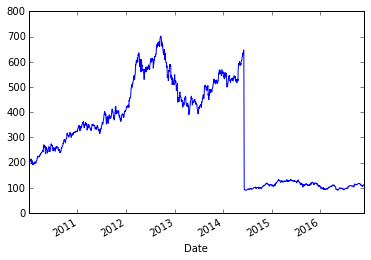

In [57]:
df3.Close.plot()

In [58]:
df3["Diff"]=df3.Close.diff()

In [59]:
df3.head()

,Open,High,Low,Close,Volume,Adj Close,Diff
Date,,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252,NaN
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396,0.369995
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683,-3.409998
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936,-0.389995
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106,1.400005


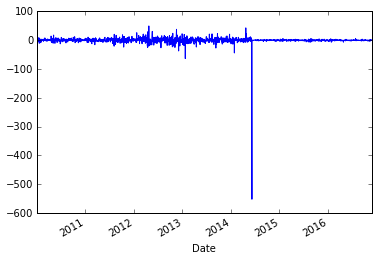

In [64]:
df3.Diff.plot()

In [61]:
df3["Real_Diff"]=df3.Diff / df3.Close

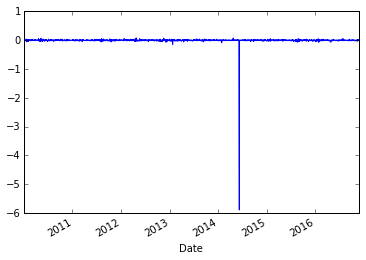

In [63]:
df3.Real_Diff.plot()

In [66]:
df3.dropna(inplace=True)

In [67]:
df3.head()

,Open,High,Low,Close,Volume,Adj Close,Diff,Real_Diff
Date,,,,,,,,
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396,0.369995,0.001726
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683,-3.409998,-0.016163
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936,-0.389995,-0.001852
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106,1.400005,0.006604
2010-01-11,212.799997,213.000002,208.450005,210.110003,115557400,27.339779,-1.870002,-0.008900


In [68]:
df3.Diff.min()

-551.87002600000005

In [69]:
df3.Diff.argmin()

Timestamp('2014-06-09 00:00:00')

In [70]:
df3.drop(df3.Diff.argmin(), inplace=True)

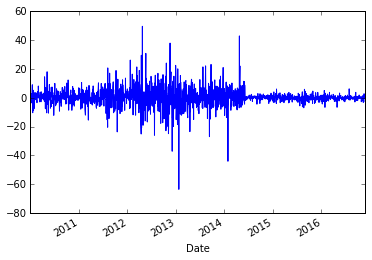

In [73]:
df3.Diff.plot()

In [74]:
f = open("grade.csv", 'r')
L = f.readlines()
f.close()
L

[',系級,學號,姓名,總點數\n',
 '0,中三甲,103101021,周政毅,1655.195\n',
 '1,教育三,103102021,翁松璠,1450.3999999999999\n',
 '2,教育四,102102063,陳品錞,1835.2\n',
 '3,哲學四,102104030,李錦藤,1879.9499999999998\n',
 '4,財二甲,104205055,潘柏樺,1171.69\n',
 '5,財三甲,103205007,徐偉達,1694.0\n',
 '6,經一乙,105208038,于雅綸,855.4350000000001\n',
 '7,經三甲,103208091,藍國祐,2160.0\n',
 '8,經三乙,103208004,張書豪,1355.1450000000002\n',
 '9,經三乙,103209022,李芸萱,1399.14\n',
 '10,經四甲,102208025,傅俞瑄,1186.2450000000001\n',
 '11,金融三,103302060,張懷傑,1384.05\n',
 '12,會一甲,105303055,黃得人,680.2\n',
 '13,會三甲,103303069,孫瑄正,1382.2849999999999\n',
 '14,會三乙,103303092,劉亮緯,739.8149999999999\n',
 '15,會四甲,102207407,何居靜,1322.195\n',
 '16,企三乙,103305100,洪瑞鋆,1642.7250000000001\n',
 '17,資三乙,103306020,曾煜祐,2118.805\n',
 '18,資三乙,103306048,蔡睿峰,1290.0\n',
 '19,資三乙,103306086,陳心弘,1595.055\n',
 '20,資四甲,102306061,何秉哲,2353.2000000000003\n',
 '21,資四甲,102306069,張為淳,1595.9950000000001\n',
 '22,資四乙,102306048,賴俊仁,2124.0\n',
 '23,傳播二,104405192,劉宇馨,594.7\n',
 '24,英四甲,102501063,?以霖,1715.0000000000002\n',
 

In [75]:
gd = pd.read_csv("grade.csv")

In [76]:
gd

,Unnamed: 0,系級,學號,姓名,總點數
0,0,中三甲,103101021,周政毅,1655.195
1,1,教育三,103102021,翁松璠,1450.400
2,2,教育四,102102063,陳品錞,1835.200
3,3,哲學四,102104030,李錦藤,1879.950
4,4,財二甲,104205055,潘柏樺,1171.690
5,5,財三甲,103205007,徐偉達,1694.000
6,6,經一乙,105208038,于雅綸,855.435
7,7,經三甲,103208091,藍國祐,2160.000
8,8,經三乙,103208004,張書豪,1355.145
9,9,經三乙,103209022,李芸萱,1399.140


In [78]:
gd.describe()

,Unnamed: 0,學號,總點數
count,50.00000,5.000000e+01,50.000000
mean,24.50000,1.034852e+08,1506.407900
std,14.57738,1.107694e+06,525.822955
min,0.00000,1.012080e+08,594.700000
25%,12.25000,1.027010e+08,1173.067500
50%,24.50000,1.033031e+08,1476.430000
75%,36.75000,1.037018e+08,1780.505000
max,49.00000,1.057010e+08,2782.065000
